Dataset link on kaggle: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

## Context

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

## Content

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

    obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
    alpha = Right Ascension angle (at J2000 epoch)
    delta = Declination angle (at J2000 epoch)
    u = Ultraviolet filter in the photometric system
    g = Green filter in the photometric system
    r = Red filter in the photometric system
    i = Near Infrared filter in the photometric system
    z = Infrared filter in the photometric system
    run_ID = Run Number used to identify the specific scan
    rereun_ID = Rerun Number to specify how the image was processed
    cam_col = Camera column to identify the scanline within the run
    field_ID = Field number to identify each field
    spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
    class = object class (galaxy, star or quasar object)
    redshift = redshift value based on the increase in wavelength
    plate = plate ID, identifies each plate in SDSS
    MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
    fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

# Loading the dataset and getting a overview

In [4]:
data = pd.read_csv("star_classification.csv")

In [5]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
# checking for null values if any
data.isnull().sum()

#looking at the output no null values are present in the dataset

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [9]:
# Removing the object ID column from the dataset as we won't be needing that for our classification purposes
data.drop(['obj_ID'],axis=1,inplace=True)

In [10]:
data.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Vizualizing the Dataset

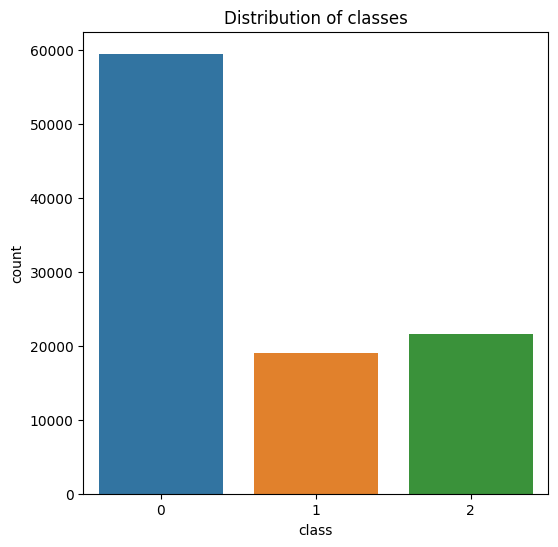

In [63]:
# Ploting a graph to find the distribution of the output classes
plt.figure(figsize=(6,6))
sns.countplot(x='class',data=data)
plt.title("Distribution of classes")
plt.show()

# looking at the output we see that our data is unbalanced and we will resample our data using resampling techniques such as SMOTE to oversample our data

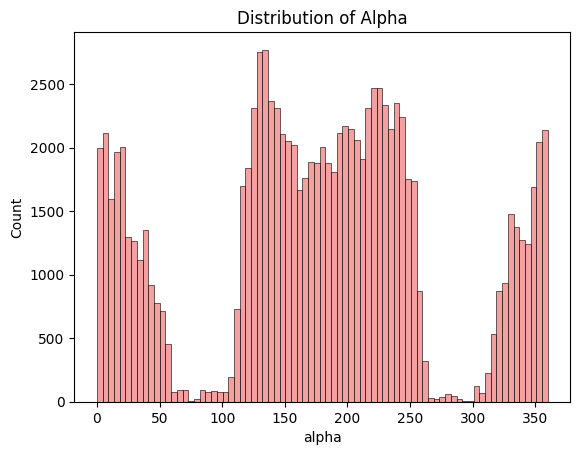

In [12]:
# Visuzalizing the alpha feature
sns.histplot(data['alpha'],color='lightcoral')
plt.title("Distribution of Alpha")
plt.show()

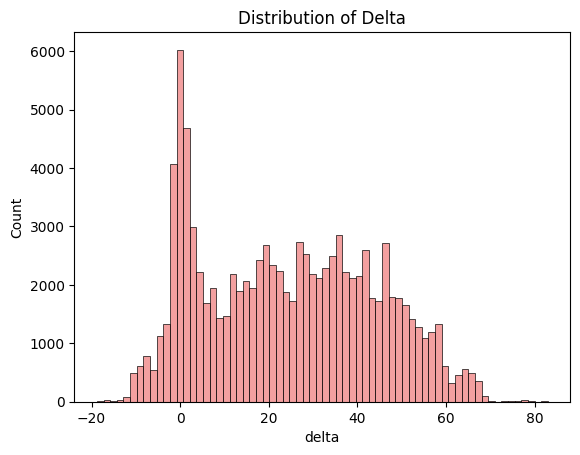

In [13]:
# Visualizing the delta feature
sns.histplot(data['delta'],color='lightcoral')
plt.title("Distribution of Delta")
plt.show()

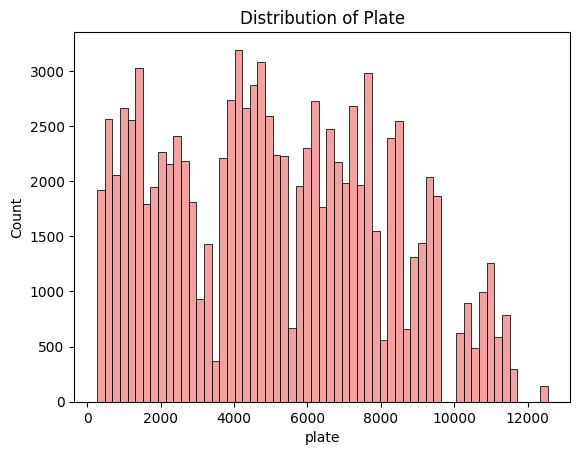

In [14]:
sns.histplot(data['plate'],color='lightcoral')
plt.title("Distribution of Plate")
plt.show()

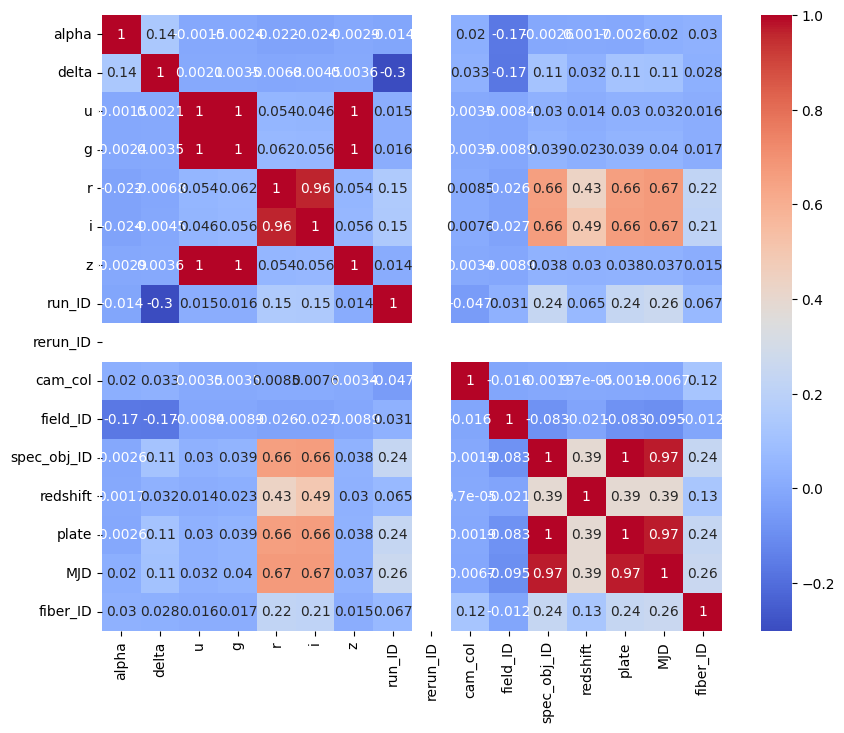

In [15]:
# finding the correlation of the dataset
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

# Encoding our output variable to numerical

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['class'] = le.fit_transform(data['class'])

In [17]:
data['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

# Selecting necessary features for our classification model

**We won't be selecting the below features as upon examining each of them, we find that they are more realted to the test setup rather than the actual test results themselves. So they won't be very helpful in our classificaiton model**

- alpha = Right Ascension angle (at J2000 epoch)
- delta = Declination angle (at J2000 epoch)
- run_ID = Run Number used to identify the specific scan
- rereun_ID = Rerun Number to specify how the image was processed-
- cam_col = Camera column to identify the scanline within the run
- field_ID = Field number to identify each field
- spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
- fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



In [18]:
X = data[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [19]:
Y = data['class']
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

# Resampling our dataset using SMOTE( Synthetic Minority Oversampling Technique )

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42,k_neighbors=5)
X_res, Y_res = sm.fit_resample(X,Y)

In [21]:
Y_res.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

# Performing Classification using Different Algorithms

Now that our dataset is prepared, we can perform differnet classification algorithms on our dataset

In [22]:
# Splitting the data into train test split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.20,random_state=42)

In [23]:
X_train.count()

u           142668
g           142668
r           142668
i           142668
z           142668
redshift    142668
plate       142668
dtype: int64

In [24]:
X_test.count()

u           35667
g           35667
r           35667
i           35667
z           35667
redshift    35667
plate       35667
dtype: int64

# Implementing vairous Classification algorithms

In [25]:
scores_df = pd.DataFrame(columns=['Algorithm','Accuracy','Recall','Precision'])

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
lr = LogisticRegression(max_iter=1000)

# fit model to training data
lr.fit(X_train,Y_train)

# make predictions on the test data
lr_predictions = lr.predict(X_test)

In [28]:
# Evaluate model's accuracy
lr_accuracy = accuracy_score(Y_test,lr_predictions)
lr_accuracy

0.93321557742451

In [29]:
lr_recall = recall_score(Y_test,lr_predictions,average='weighted')
lr_recall

0.93321557742451

In [30]:
lr_precision = precision_score(Y_test,lr_predictions,average='weighted')
lr_precision

0.9331399243882114

In [31]:
# Adding the results to scores dataframe
scores_df=scores_df.append({'Algorithm':'Logistic Regression','Accuracy':lr_accuracy,'Recall':lr_recall,'Precision':lr_precision},ignore_index=True)
scores_df

,Algorithm,Accuracy,Recall,Precision
0,Logistic Regression,0.933216,0.933216,0.93314


## K-Nearest-Neighbours

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)

knn_predictions= knn.predict(X_test)



In [34]:
knn_accuracy = accuracy_score(Y_test,knn_predictions)
knn_accuracy

0.9338884683320716

In [35]:
knn_precision = precision_score(Y_test,knn_predictions,average='weighted')
knn_precision

0.9337177450651136

In [36]:
knn_recall = recall_score(Y_test,knn_predictions,average='weighted')
knn_recall

0.9338884683320716

In [37]:
# Comparing various k values(neighbours) to find out which k gives us the best result

# Define a range of k values from 1 to 10
k_values = list(range(1, 11))

# Create empty lists to store results
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the results for each k value
for i, k in enumerate(k_values):
    print(f"K = {k} - Accuracy: {accuracy_scores[i]}, Precision: {precision_scores[i]}, Recall: {recall_scores[i]}")

# From the output we can tell that for k=1 we got the best result, so we will move forward with it.

K = 1 - Accuracy: 0.9338884683320716, Precision: 0.9337177450651136, Recall: 0.9338884683320716
K = 2 - Accuracy: 0.9152718198895338, Precision: 0.9181172020968438, Recall: 0.9152718198895338
K = 3 - Accuracy: 0.9176830123082962, Precision: 0.9175522048871717, Recall: 0.9176830123082962
K = 4 - Accuracy: 0.9073653517256848, Precision: 0.908994927469889, Recall: 0.9073653517256848
K = 5 - Accuracy: 0.905627050214484, Precision: 0.9057852195994749, Recall: 0.905627050214484
K = 6 - Accuracy: 0.8978888047775254, Precision: 0.8996389593020737, Recall: 0.8978888047775254
K = 7 - Accuracy: 0.8964308744778087, Precision: 0.896858405462965, Recall: 0.8964308744778087
K = 8 - Accuracy: 0.8904589676731993, Precision: 0.8923256695034082, Recall: 0.8904589676731993
K = 9 - Accuracy: 0.8888047775254437, Precision: 0.889663267039826, Recall: 0.8888047775254437
K = 10 - Accuracy: 0.8818515714806404, Precision: 0.8839781838982868, Recall: 0.8818515714806404


In [38]:
# Adding the results to scores dataframe
scores_df=scores_df.append({'Algorithm':'K-Nearest-Neighbours','Accuracy':knn_accuracy,'Recall':knn_recall,'Precision':knn_precision},ignore_index=True)
scores_df

,Algorithm,Accuracy,Recall,Precision
0,Logistic Regression,0.933216,0.933216,0.933140
1,K-Nearest-Neighbours,0.933888,0.933888,0.933718


## Descision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train,Y_train)

decision_tree_prediction = decision_tree.predict(X_test)


In [41]:
# Calculate accuracy, precision, and recall
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_prediction)


In [42]:
decision_tree_precision = precision_score(Y_test, decision_tree_prediction, average='weighted')


In [43]:
decision_tree_recall = recall_score(Y_test, decision_tree_prediction, average='weighted')


In [44]:
scores_df=scores_df.append({'Algorithm':'Decision Trees','Accuracy':decision_tree_accuracy,'Recall':decision_tree_recall,'Precision':decision_tree_precision},ignore_index=True)
scores_df

,Algorithm,Accuracy,Recall,Precision
0,Logistic Regression,0.933216,0.933216,0.933140
1,K-Nearest-Neighbours,0.933888,0.933888,0.933718
2,Decision Trees,0.972271,0.972271,0.972280


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest = RandomForestClassifier(n_estimators=20,random_state=42)

random_forest.fit(X_train,Y_train)

random_forest_prediction = random_forest.predict(X_test)

In [49]:
rf_accuracy = accuracy_score(Y_test,random_forest_prediction)
rf_accuracy

0.9822805394342109

In [52]:
rf_recall = recall_score(Y_test,random_forest_prediction,average='weighted')
rf_recall

0.9822805394342109

In [53]:
rf_precision = precision_score(Y_test,random_forest_prediction,average='weighted')
rf_precision

0.9823321361598827

In [54]:
scores_df=scores_df.append({'Algorithm':'Random Forest','Accuracy':rf_accuracy,'Recall':rf_recall,'Precision':rf_precision},ignore_index=True)
scores_df

,Algorithm,Accuracy,Recall,Precision
0,Logistic Regression,0.933216,0.933216,0.933140
1,K-Nearest-Neighbours,0.933888,0.933888,0.933718
2,Decision Trees,0.972271,0.972271,0.972280
3,Random Forest,0.982281,0.982281,0.982332
